In [98]:
import numpy as np
import pandas as pd
import sqlite3
import os
import calendar
from datetime import datetime
import math
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

import  my_fin_common_libs.ts_asset_builder as build_ts_asset
import my_fin_common_libs.data_loader as load_data

#TopN_ROC_XPeriod.apx
#ListPrice.afl
# D:\InvestmentCorner\InvestmentSystem\XAlfa\AB-AFLCode\SytemTradeX\ModuleDev

In [99]:
data_path=r"D:\PythonDev\MyQuantFinProject\Data"
result_path=r"D:\PythonDev\MyQuantFinProject\Data\Report"

In [100]:
# Export on explaratoin in AB 
# Set price at the first date that you want to compare   , it is key differece from TooN23ROC
from_month_str='2022-01-01'
to_month_str='2022-12-31'
feq ='Q'  # support month=M,quater=Q,year=Y

data_file_name=f"AllMyThai-y20T22"

# title=f"{data_file_name}-{feq}-20t22"
title=f"KKP-Tisco-Y22"

data_file=f"{data_path}\\{data_file_name}.csv"
print(data_file)

if os.path.exists(data_file)==False:
    raise Exception(f'{data_file} did not exist')
if os.path.exists(result_path)==False:
    raise Exception(f'{result_path} did not exist')




D:\PythonDev\MyQuantFinProject\Data\AllMyThai-y20T22.csv


In [101]:
buildtime = datetime.now().strftime('%d%m%y_%H%M')
print(f"Build Report  DataFile {data_file} since {from_month_str} - {to_month_str} at {buildtime}")

Build Report  DataFile D:\PythonDev\MyQuantFinProject\Data\AllMyThai-y20T22.csv since 2022-01-01 - 2022-12-31 at 201222_1830


In [102]:
df,list_fund_name=load_data.load_offline_data(from_month_str,to_month_str,data_file)

print(list_fund_name)
df.info()

Load Price Data
             symbol   price
date                       
2022-01-04  ASP-T12  12.145
2022-01-05  ASP-T12  12.239
2022-01-06  ASP-T12  12.074
           symbol   price
date                     
2022-12-14  TSF-A  84.054
2022-12-15  TSF-A  83.365
2022-12-16  TSF-A  83.372
['ASP-T12', 'ASP-THEQ', 'K-MIDSMALL', 'KKP-ACT-EQ-A', 'KKP-SM-CAP', 'KKP-TQG', 'TISCOFLEXP', 'TISCOMS-A', 'TLEQ', 'TLFLEX', 'TLMSEQ-A', 'TSF-A']
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2728 entries, 2022-01-04 to 2022-12-16
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   symbol  2728 non-null   object 
 1   price   2728 non-null   float64
dtypes: float64(1), object(1)
memory usage: 63.9+ KB


D:\PythonDev\MyQuantFinProject\FinQuant\my_fin_common_libs\data_loader.py:83: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  df=df.loc[from_month_str:to_month_str,:]


In [103]:
fundPerfByPeriod_df=build_ts_asset.build_asset_timeseries(from_month_str,to_month_str,feq)
fundPerfByPeriod_df

DatetimeIndex(['2022-03-31', '2022-06-30', '2022-09-30', '2022-12-31'], dtype='datetime64[ns]', freq='Q-DEC')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Start_Date  4 non-null      datetime64[ns]
 1   End_Date    4 non-null      datetime64[ns]
 2   NoMonth     4 non-null      int32         
 3   Period      4 non-null      object        
dtypes: datetime64[ns](2), int32(1), object(1)
memory usage: 240.0+ bytes
  Start_Date   End_Date  NoMonth       Period
0 2022-01-01 2022-03-31        3  Jan22_Mar22
1 2022-04-01 2022-06-30        3  Apr22_Jun22
2 2022-07-01 2022-09-30        3  Jul22_Sep22
3 2022-10-01 2022-12-31        3  Oct22_Dec22


,Start_Date,End_Date,NoMonth,Period
0,2022-01-01,2022-03-31,3,Jan22_Mar22
1,2022-04-01,2022-06-30,3,Apr22_Jun22
2,2022-07-01,2022-09-30,3,Jul22_Sep22
3,2022-10-01,2022-12-31,3,Oct22_Dec22


In [104]:
min_data=df.index.min()
max_data=df.index.max()
min_period=fundPerfByPeriod_df.Start_Date.min()
max_period=fundPerfByPeriod_df.End_Date.max()

if min_data<min_period or max_data>max_period :
    raise(f"Ethier Max or Min Date  of Data is out of range {min_period} - {max_period}")
else:
   print(f"{min_data} - {max_data} are in range {min_period} - {max_period}")

2022-01-04 00:00:00 - 2022-12-16 00:00:00 are in range 2022-01-01 00:00:00 - 2022-12-31 00:00:00


In [105]:
#list_fund_name=['KKP-ACT-EQ-A', 'KKP-SM-CAP','KKP-TQG','TISCOFLEXP','TSF-A','TISCOMS-A']

print(list_fund_name)
dictPriceOfFund=load_data.group_data_by_symbol(from_month_str,to_month_str,df,list_fund_name)

['KKP-ACT-EQ-A', 'KKP-SM-CAP', 'KKP-TQG', 'TISCOFLEXP', 'TSF-A', 'TISCOMS-A']
Seperate dataframe  by symbol as dictionary
List Fund : ['KKP-ACT-EQ-A', 'KKP-SM-CAP', 'KKP-TQG', 'TISCOFLEXP', 'TSF-A', 'TISCOMS-A']
=============================KKP-ACT-EQ-A=============================
             price
date              
2022-01-04  18.766
2022-01-05  18.845
2022-01-06  18.587
             price
date              
2022-12-14  19.046
2022-12-15  18.744
2022-12-16  18.658
=============================KKP-SM-CAP=============================
             price
date              
2022-01-04  18.545
2022-01-05  18.656
2022-01-06  18.587
             price
date              
2022-12-14  17.571
2022-12-15  17.180
2022-12-16  17.081
=============================KKP-TQG=============================
             price
date              
2022-02-28  10.000
2022-03-01   9.979
2022-03-02   9.922
            price
date             
2022-12-14  8.834
2022-12-15  8.713
2022-12-16  8.678
=================

# Combine Fund

In [106]:
tf_nPart=0

list_ex_fund=[]
removed_symbolList=[]
mix_symbolList=[]
# mix_symbolList=[
#                 { 'MyTheme':[{'GIMPACT-KKP':0.25},{'B-GTO':0.25},{'GlobEnv B-SIP':0.3},{'CleanEng B-SIP':0.2} ] }
#                 ,{ 'MyWorld':[{'ACWI':0.5},{'SPY':0.5} ] }  
#                ]    

# Wait to implement
print("check valid combination")
if len(mix_symbolList)>0:
    
    AllFunds =meta_df['Name'].tolist()
    print("All Master Funds")
    print(AllFunds)

    NotInAllFunds=[]
    WeightsError=[]
    for  mix_symbol  in mix_symbolList:    
      for new_fund, fundList in mix_symbol.items():
        print(f"==========={new_fund} # List Sub-Fund and its Weight===========") 
        sum_weights =0
        for fundDict  in fundList: 
            print(fundDict)  

            for  xfund, xweights in fundDict.items():

             # check whether the fund are in master list   
              if xfund  not in AllFunds:
                 NotInAllFunds.append(xfund)  


              sum_weights+=xweights

        if  sum_weights!=1:
             WeightsError.append(mix_symbol)



    # print(mix_symbolList)

    if len(NotInAllFunds)>0 or len(WeightsError)>0:
       print("################# Error #################") 
       if len(NotInAllFunds)>0 :
        print("=======================Not In All Master Funds=======================")
        print(NotInAllFunds)
       if len(WeightsError)>0:
        print("=======================Weights Error=======================")
        print(WeightsError)      
       raise Exception(f"Some sub-funds are not in {AllFunds} or SumOFWeights is not equal to 1")  
else:
    print("no combination")
    

check valid combination
no combination


In [107]:
def cal_percent_return(item,fundTemp_df):
    
    start_from=item['Start_Date']
    end_to=item['End_Date']
    
    # filter by date
    tempDF=fundTemp_df.loc[start_from:end_to,:]
    
    if tempDF.empty==False:
    
        start_price=float(tempDF.iloc[0, 0])  # the first record of each period
        end_price=float(tempDF.iloc[len(tempDF)-1, 0]) # the last record of each period

        invest_return =(end_price-start_price)/start_price*100
        invest_return=round(invest_return,1)
        #print(tempDF)                          
        print(f"{start_from} to {end_to} : ROC =({end_price}-{start_price})/{start_price} x 100= {invest_return} %")   
        return invest_return
    else:
        print(f"{start_from} to {end_to} : Not found data to calculate ROC %")
        return np.nan
                                                              
print("Calcualte percentage of Performance return for each fund as given period investment")


for x_name,fund_df in dictPriceOfFund.items():
    
    
  print(f"=========================={x_name}==================================================")

#   print(fund_df.info())

  print("----------------------Head---------------------------------------")
  print(fund_df.head())  
    
  print("----------------------Tail---------------------------------------")  
  print(fund_df.tail())
    
    
  print(f"==========================cal_percent_return==================================================")
  fundPerfByPeriod_df[x_name]=fundPerfByPeriod_df.apply(cal_percent_return,axis=1,args=(fund_df,))
  print("***********************************************************************************************")

fundPerfByPeriod_df

Calcualte percentage of Performance return for each fund as given period investment
==========================KKP-ACT-EQ-A==================================================
----------------------Head---------------------------------------
             price
date              
2022-01-04  18.766
2022-01-05  18.845
2022-01-06  18.587
2022-01-07  18.645
2022-01-10  18.654
----------------------Tail---------------------------------------
             price
date              
2022-12-09  18.969
2022-12-13  19.007
2022-12-14  19.046
2022-12-15  18.744
2022-12-16  18.658
==========================cal_percent_return==================================================
2022-01-01 00:00:00 to 2022-03-31 00:00:00 : ROC =(19.442-18.766)/18.766 x 100= 3.6 %
2022-04-01 00:00:00 to 2022-06-30 00:00:00 : ROC =(18.661-19.464)/19.464 x 100= -4.1 %
2022-07-01 00:00:00 to 2022-09-30 00:00:00 : ROC =(18.554-18.676)/18.676 x 100= -0.7 %
2022-10-01 00:00:00 to 2022-12-31 00:00:00 : ROC =(18.658-18.159)/18.159 x

,Start_Date,End_Date,NoMonth,Period,KKP-ACT-EQ-A,KKP-SM-CAP,KKP-TQG,TISCOFLEXP,TSF-A,TISCOMS-A
0,2022-01-01,2022-03-31,3,Jan22_Mar22,3.6,-0.9,1.8,-3.5,-3.2,-3.7
1,2022-04-01,2022-06-30,3,Apr22_Jun22,-4.1,-6.6,-10.4,-7.0,-8.8,-10.8
2,2022-07-01,2022-09-30,3,Jul22_Sep22,-0.7,0.4,-3.2,1.4,4.4,1.9
3,2022-10-01,2022-12-31,3,Oct22_Dec22,2.7,2.6,1.4,9.3,8.1,3.3


# Create Directoy to store report

In [108]:
report_path=os.path.join(result_path, title )
chart_path=os.path.join(report_path,"chart_price" ) 

try:  
 if not os.path.exists(report_path):
     os.mkdir(report_path)  
 if not os.path.exists(chart_path):
     os.mkdir(chart_path)       
     
except OSError as error:  
    raise error
    
print(report_path)
print(chart_path)

D:\PythonDev\MyQuantFinProject\Data\Report\KKP-Tisco-Y22
D:\PythonDev\MyQuantFinProject\Data\Report\KKP-Tisco-Y22\chart_price


# Plot Line Chart  to compare percentage

In [109]:
period_df=fundPerfByPeriod_df.loc[:,["Start_Date","End_Date"]]
len_period_xyz=len(period_df)

# split as your want
if tf_nPart>0 and tf_nPart<len_period_xyz:
  tf_nPart=math.floor(len_period_xyz/tf_nPart)  

else:
  tf_nPart=len_period_xyz  
# split half    
array_tf = np.array_split(period_df, tf_nPart)
array_tf_half = np.array_split(period_df, 2)
array_tf.extend(array_tf_half)
# add all
array_tf.append(period_df)

print(f'No-partition = {len(array_tf)} of {len_period_xyz} periods')

No-partition = 7 of 4 periods


In [110]:
def create_pct_acc_df(df_temp,start_pct,end_pct):
    
 df_temp=fund_df.loc[start_pct:end_pct,:]
 df_temp=df_temp.pct_change()
 df_temp=(1+df_temp).cumprod()  #1 is starting point
 df_temp=df_temp.rename(columns={'price':'cum_return_pct'})
 df_temp.fillna(1,inplace=True)

 return df_temp 


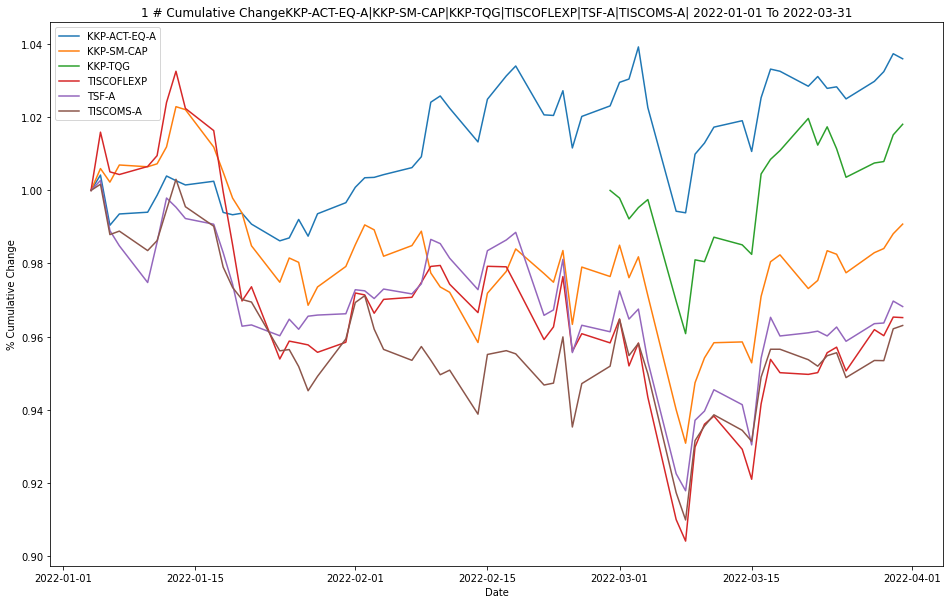

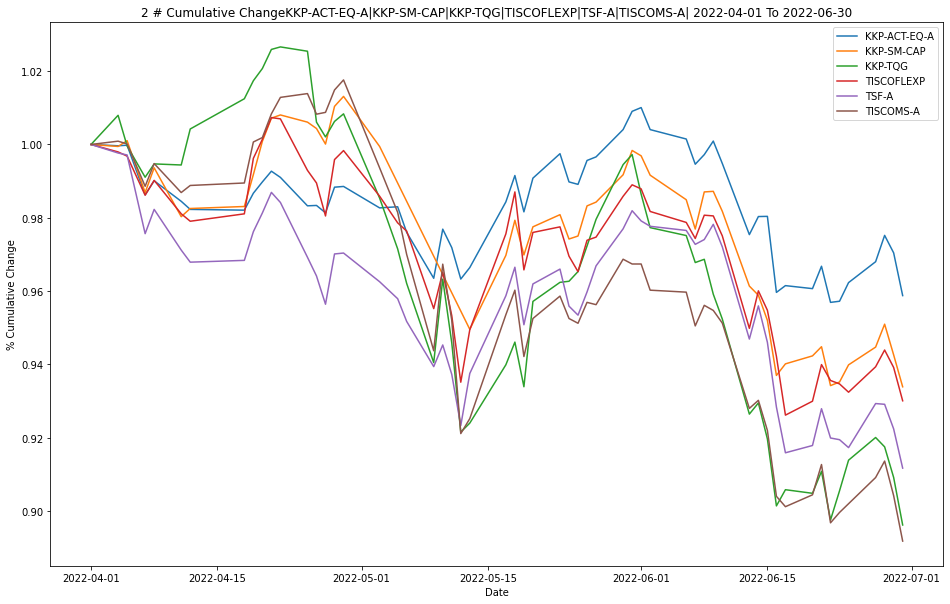

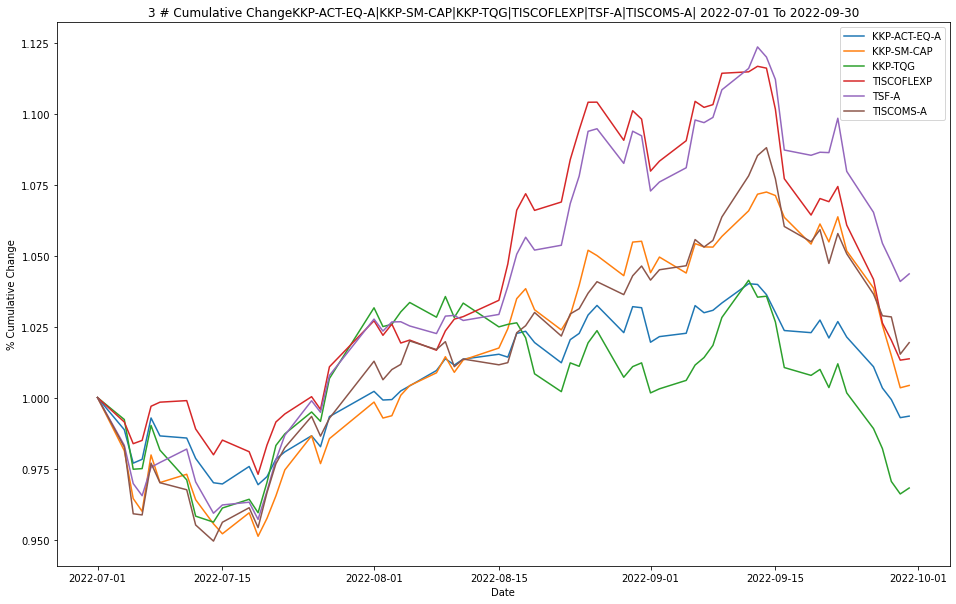

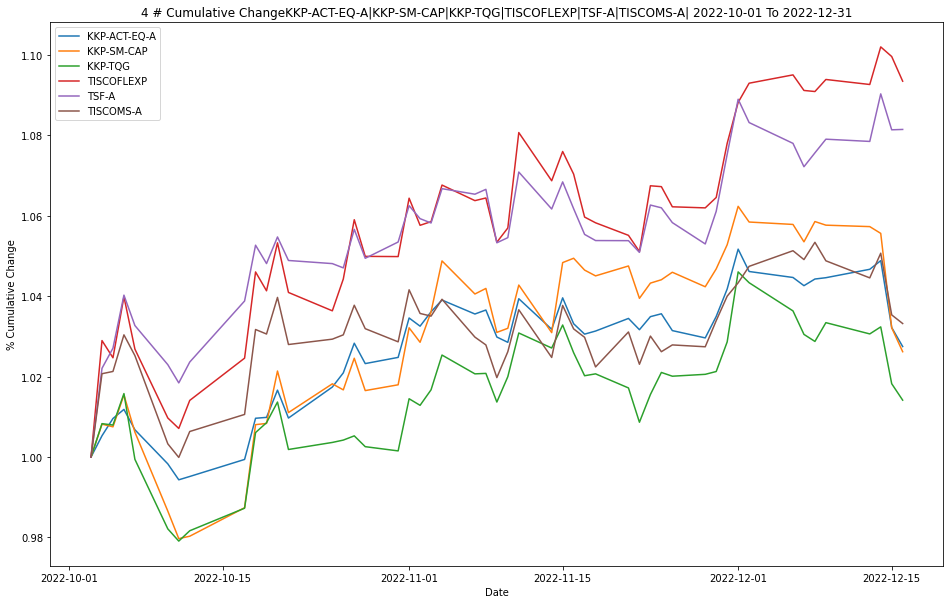

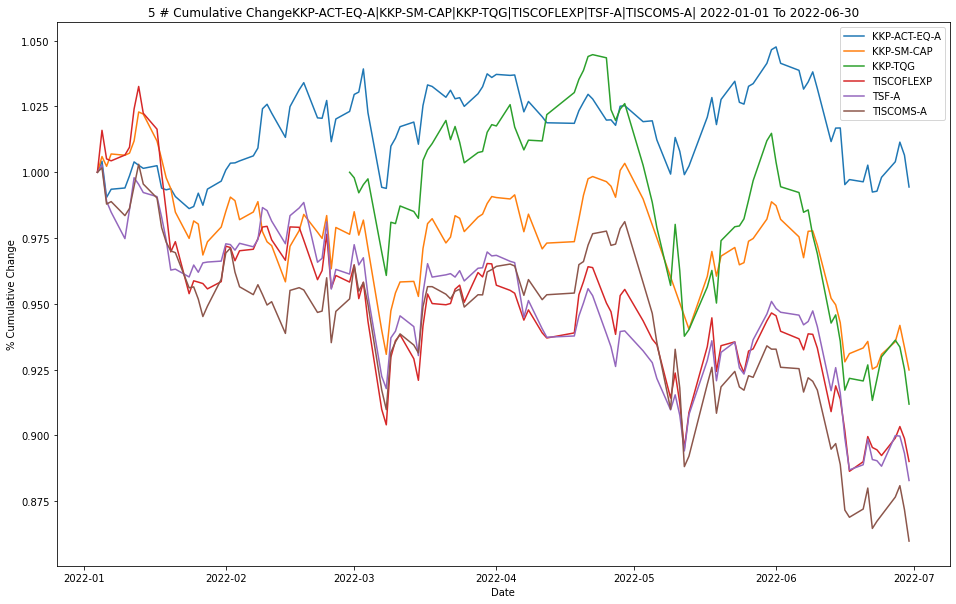

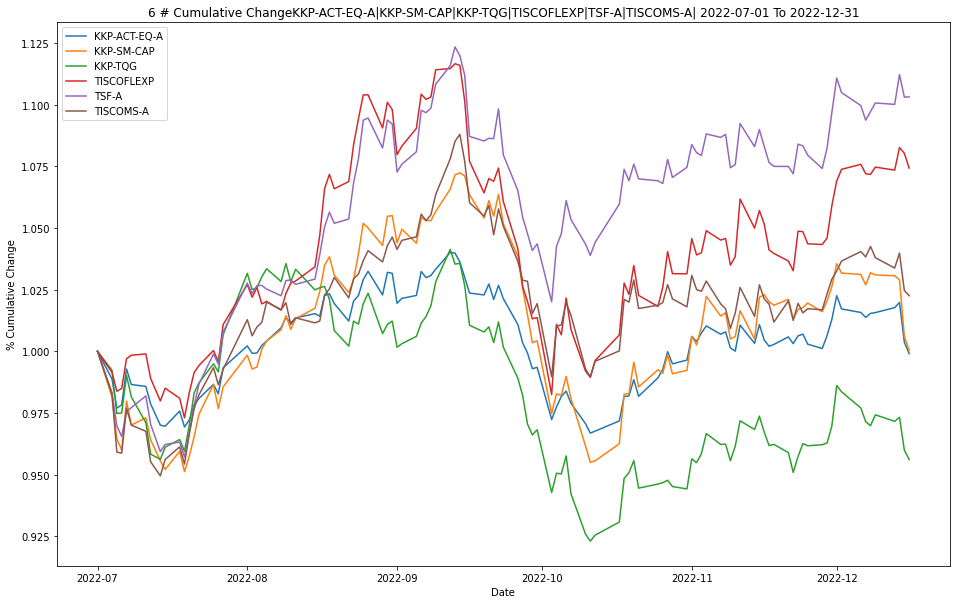

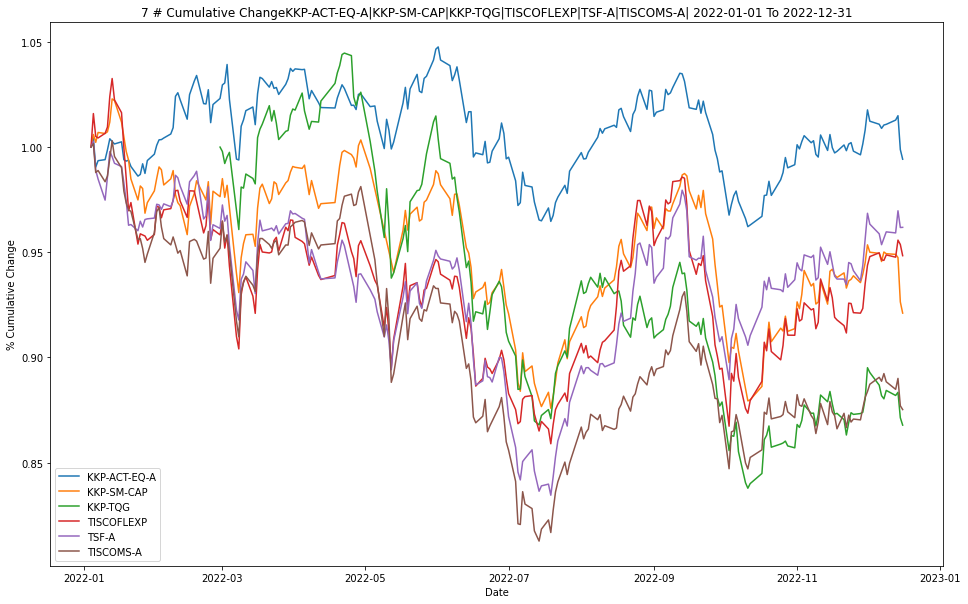

In [111]:
# loop period of time
count_pic=0
for x in array_tf:
    
    x.reset_index(drop=True,inplace=True)
    start_pct=x.loc[0,"Start_Date"].strftime('%Y-%m-%d')
    end_pct=x.loc[len(x)-1,"End_Date"].strftime('%Y-%m-%d')
    
    fig = plt.figure(figsize = (16, 10))
    symbols=''
    for x_name,fund_df in dictPriceOfFund.items():

          df=create_pct_acc_df(fund_df,start_pct,end_pct)  
          #print(f'==========={x_name}==================')    
          #  print(df.head(5))   
          #  print(df.tail(5))    

          plt.plot(df.index,df['cum_return_pct'],label =x_name)
          symbols += f'{x_name}|'

    plt.legend() 
    plt.xlabel("Date")
    plt.ylabel("% Cumulative Change")
    
    count_pic=count_pic+1
    plt.title(f"{count_pic} # Cumulative Change{symbols} {start_pct} To {end_pct}")
    plt.savefig(f'{chart_path}\\{count_pic}#{start_pct}_{end_pct}.png')

    plt.show()



In [112]:
period_df=None
array_tf=None



In [113]:
no_half_row=math.floor(len(fundPerfByPeriod_df)/2)
print("No-Haft :",no_half_row)

fundPerfByPeriod_df.drop(columns=["Start_Date","End_Date"],inplace=True)
dictPriceOfFund=None

start_test=fundPerfByPeriod_df.loc[0,"Period"]
end_test=fundPerfByPeriod_df.loc[len(fundPerfByPeriod_df)-1,"Period"]

print(f"{start_test}-{end_test}")

fundPerfByPeriod_df

No-Haft : 2
Jan22_Mar22-Oct22_Dec22


,NoMonth,Period,KKP-ACT-EQ-A,KKP-SM-CAP,KKP-TQG,TISCOFLEXP,TSF-A,TISCOMS-A
0,3,Jan22_Mar22,3.6,-0.9,1.8,-3.5,-3.2,-3.7
1,3,Apr22_Jun22,-4.1,-6.6,-10.4,-7.0,-8.8,-10.8
2,3,Jul22_Sep22,-0.7,0.4,-3.2,1.4,4.4,1.9
3,3,Oct22_Dec22,2.7,2.6,1.4,9.3,8.1,3.3


In [114]:
print("create combination combination")
def combine_funds(item,listFundsToCombine):
    new_fund_sum=0
    for fundDict in listFundsToCombine:
      
      for  fund_name, fund_weights in fundDict.items():
       #print(fund_name , fund_weights)     
       new_fund_sum+=  item[fund_name]*fund_weights

    new_fund_avg=new_fund_sum
    #print(f'fundDict ={new_fund_avg}')
    return round (new_fund_avg,2)
 


for  mix_symbol  in mix_symbolList:
    for new_fund, fundList in mix_symbol.items():
        
       print(new_fund)
       print(fundList)
    
       fundPerfByPeriod_df[new_fund]= fundPerfByPeriod_df.apply(combine_funds,axis=1,args=(fundList,))
       fundPerfByPeriod_df.apply(combine_funds,axis=1,args=(fundList,))
    
       list_fund_name.append(new_fund)
       list_ex_fund.append(new_fund) 
    
if len(list_ex_fund)>0:   
 print(list_fund_name)
 print(list_ex_fund)
 print("Show Fund After any mixture funds")
 print(fundPerfByPeriod_df )
else:
 print("No fund combination")
    

create combination combination
No fund combination


In [115]:
print("1-Actual Return")
fund_x=fundPerfByPeriod_df[['Period']+list_fund_name]
fund_x["_AVG_"]=fund_x[list_fund_name].mean(axis=1,skipna=True).round(1)

list_fund_name.append('_AVG_')
list_ex_fund.append('_AVG_')
list_ex_fund.sort(reverse = True)
list_fund_name=list_ex_fund+list(set(list_fund_name).difference(set(list_ex_fund)))


no_record=len(fundPerfByPeriod_df)
fundPerfByPeriod_df=None

print(list_fund_name)
print(list_ex_fund)
fund_x

1-Actual Return
['_AVG_', 'KKP-SM-CAP', 'KKP-TQG', 'KKP-ACT-EQ-A', 'TISCOMS-A', 'TSF-A', 'TISCOFLEXP']
['_AVG_']


,Period,KKP-ACT-EQ-A,KKP-SM-CAP,KKP-TQG,TISCOFLEXP,TSF-A,TISCOMS-A,_AVG_
0,Jan22_Mar22,3.6,-0.9,1.8,-3.5,-3.2,-3.7,-1.0
1,Apr22_Jun22,-4.1,-6.6,-10.4,-7.0,-8.8,-10.8,-8.0
2,Jul22_Sep22,-0.7,0.4,-3.2,1.4,4.4,1.9,0.7
3,Oct22_Dec22,2.7,2.6,1.4,9.3,8.1,3.3,4.6


In [116]:
if no_record>=2:
    print(f"2.1-Actual the first {no_half_row} +-1 times Return")
    fund_xFirstHalf=fund_x.iloc [0:no_half_row,:]   
    fund_xFirstHalf.reset_index(drop=True,inplace=True)
    print(fund_xFirstHalf)

2.1-Actual the first 2 +-1 times Return
        Period  KKP-ACT-EQ-A  KKP-SM-CAP  KKP-TQG  TISCOFLEXP  TSF-A  \
0  Jan22_Mar22           3.6        -0.9      1.8        -3.5   -3.2   
1  Apr22_Jun22          -4.1        -6.6    -10.4        -7.0   -8.8   

   TISCOMS-A  _AVG_  
0       -3.7   -1.0  
1      -10.8   -8.0  


In [117]:
if no_record>=2:
    print(f"2.2-Actual the last {no_half_row} times Return")
    fund_xLastHalf=fund_x.iloc [no_half_row:fund_x.shape[0],:]   
    fund_xLastHalf.reset_index(drop=True,inplace=True)
    print(fund_xLastHalf)

2.2-Actual the last 2 times Return
        Period  KKP-ACT-EQ-A  KKP-SM-CAP  KKP-TQG  TISCOFLEXP  TSF-A  \
0  Jul22_Sep22          -0.7         0.4     -3.2         1.4    4.4   
1  Oct22_Dec22           2.7         2.6      1.4         9.3    8.1   

   TISCOMS-A  _AVG_  
0        1.9    0.7  
1        3.3    4.6  


In [118]:
def find_rank(fund_temp,list_fundX,FinalRank_ColName):
    fundPerfRank=fund_temp[list_fundX]
    fundPerfRank.index.set_names('Fund-Period',inplace=True)
    fundPerfRank=fundPerfRank.T
    
    for colNameToRank in fundPerfRank.columns:
      fundPerfRank[colNameToRank]=fundPerfRank[colNameToRank].rank(method='max')
    
    fundPerfRank["XAvgRank"]=fundPerfRank.mean(axis=1,skipna=True).round(1)
    
    fundPerfRank[FinalRank_ColName]=fundPerfRank['XAvgRank'].rank(method='max')
    fundPerfRank[FinalRank_ColName]=fundPerfRank[FinalRank_ColName].round(0)
    
    
    fundPerfRank["%Rank"]=fundPerfRank[FinalRank_ColName].rank(method='max',pct = True)
    fundPerfRank["%Rank"]=(fundPerfRank["%Rank"]*100).round(1)
    
    fundPerfRank=fundPerfRank.sort_values(by=FinalRank_ColName,ascending=False)
    
    fundPerfRank=fundPerfRank.drop(columns=['XAvgRank'])
    
    
    return fundPerfRank



In [119]:
def plot_rank_line(df_rank,rank_name):

    rank_x_chart=df_rank.drop(columns=['%Rank'])
    rank_x_chart=rank_x_chart.T
    rank_x_Cols=rank_x_chart.columns.tolist()

    fig = plt.figure(figsize = (20, 12))
    for x_name in rank_x_Cols:   
          plt.plot(rank_x_chart.index,rank_x_chart[x_name],label =x_name)

    X_axis = np.arange(len(rank_x_chart))
    plt.legend() 
    plt.xticks(X_axis, rank_x_chart.index,rotation='vertical')
    plt.xlabel("Date")
    plt.ylabel("Rank Return")

    rotation='vertical'

    plt.title(f"{rank_name}")
    plt.savefig(f'{report_path}\\Rank_{rank_name}.png')

    plt.show()

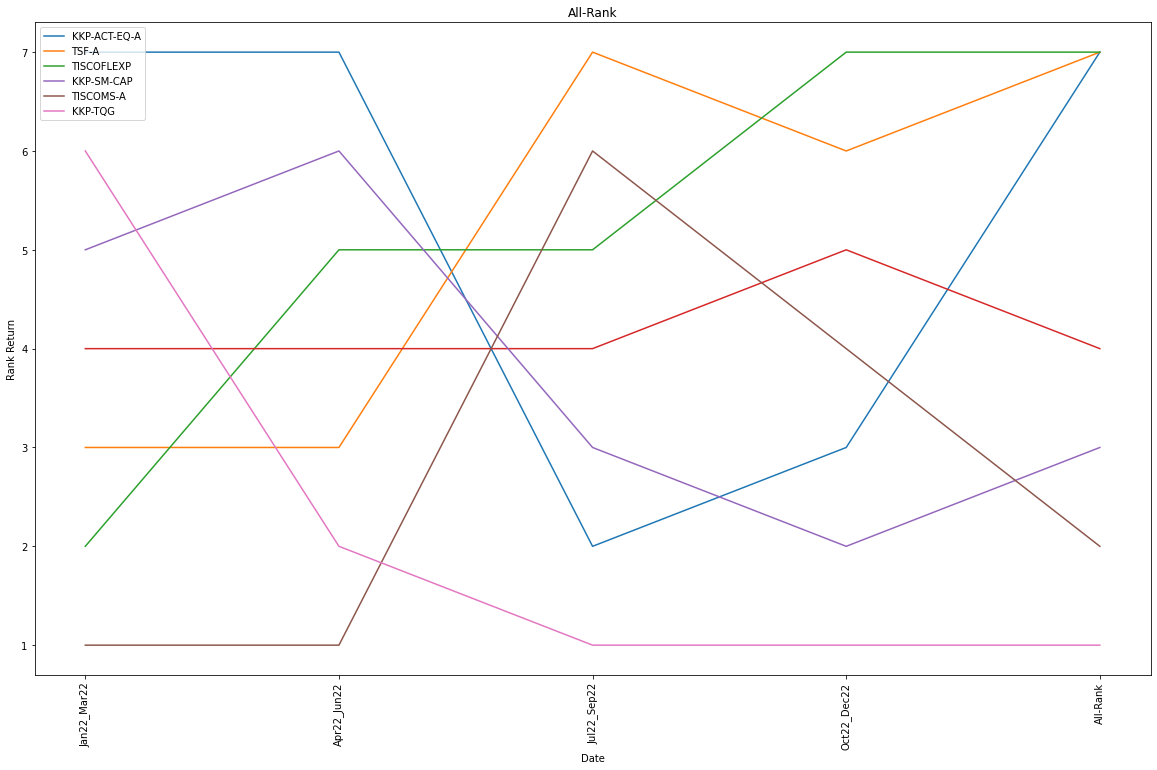

Fund-Period,Jan22_Mar22,Apr22_Jun22,Jul22_Sep22,Oct22_Dec22,All-Rank,%Rank
KKP-ACT-EQ-A,7.0,7.0,2.0,3.0,7.0,100.0
TSF-A,3.0,3.0,7.0,6.0,7.0,100.0
TISCOFLEXP,2.0,5.0,5.0,7.0,7.0,100.0
_AVG_,4.0,4.0,4.0,5.0,4.0,57.1
KKP-SM-CAP,5.0,6.0,3.0,2.0,3.0,42.9
TISCOMS-A,1.0,1.0,6.0,4.0,2.0,28.6
KKP-TQG,6.0,2.0,1.0,1.0,1.0,14.3


In [120]:
fund_x=fund_x.set_index("Period",drop=True)
rankCol_name_all='All-Rank'
rank_x=find_rank(fund_x,list_fund_name,rankCol_name_all)
plot_rank_line(rank_x, rankCol_name_all)
rank_x

_MA#2


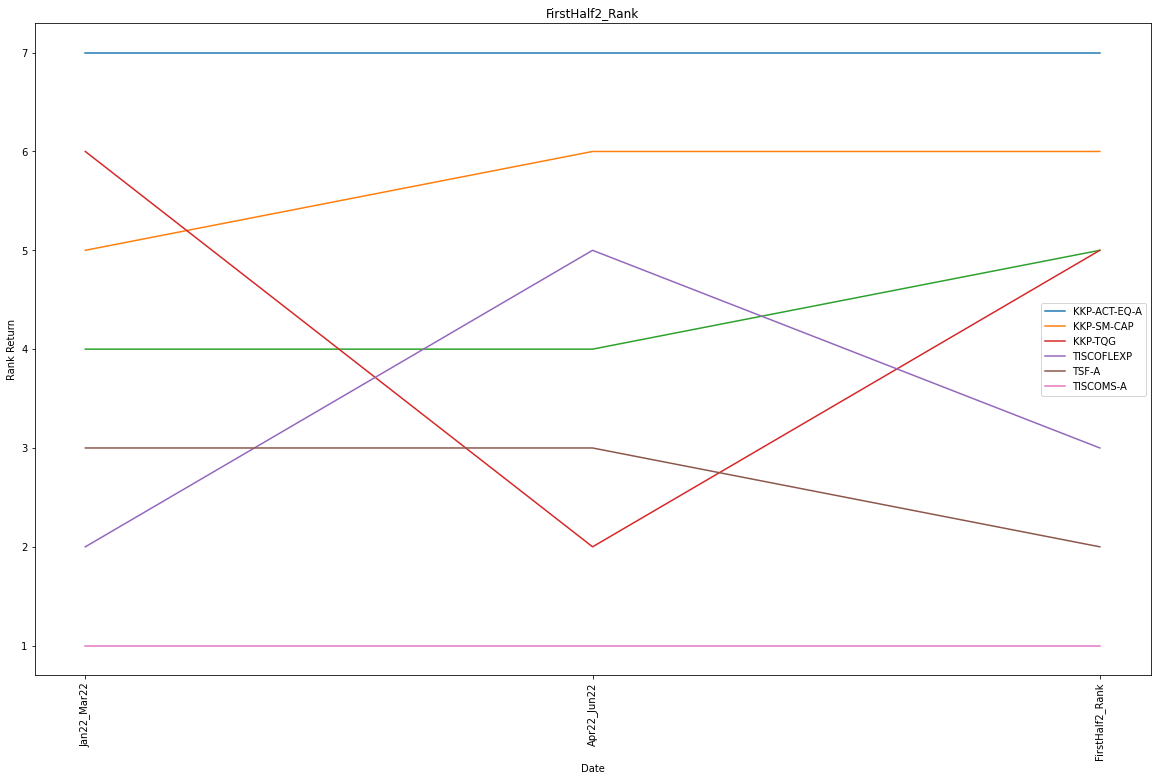

Fund-Period   Jan22_Mar22  Apr22_Jun22  FirstHalf2_Rank  %Rank
KKP-ACT-EQ-A          7.0          7.0              7.0  100.0
KKP-SM-CAP            5.0          6.0              6.0   85.7
_AVG_                 4.0          4.0              5.0   71.4
KKP-TQG               6.0          2.0              5.0   71.4
TISCOFLEXP            2.0          5.0              3.0   42.9
TSF-A                 3.0          3.0              2.0   28.6
TISCOMS-A             1.0          1.0              1.0   14.3


In [121]:
val_ma=no_half_row
str_MA=f'_MA#{val_ma}'
print(str_MA)

if no_record>=2:

    rankCol_name_first=f'FirstHalf{val_ma}_Rank'


    fund_xFirstHalf=fund_xFirstHalf.set_index("Period",drop=True)

    rank_firstY=find_rank(fund_xFirstHalf,list_fund_name,rankCol_name_first)

    plot_rank_line(rank_firstY,rankCol_name_first )
    print(rank_firstY)


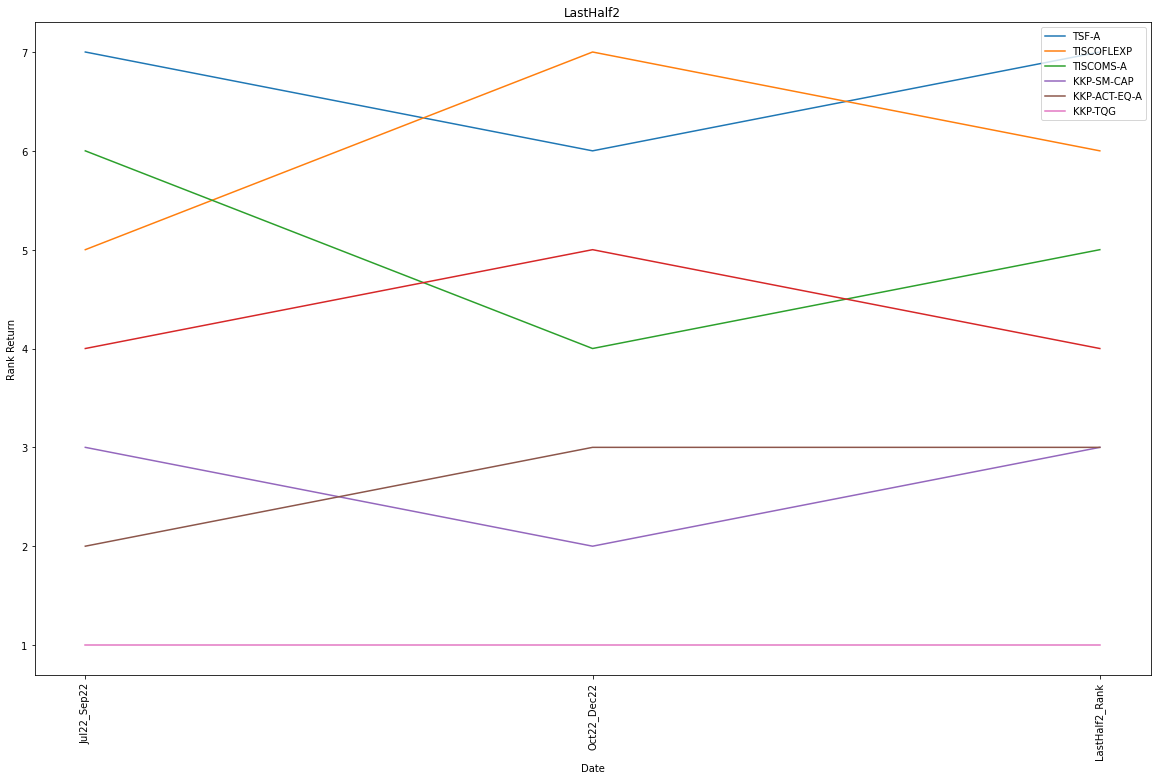

Fund-Period   Jul22_Sep22  Oct22_Dec22  LastHalf2_Rank  %Rank
TSF-A                 7.0          6.0             7.0  100.0
TISCOFLEXP            5.0          7.0             6.0   85.7
TISCOMS-A             6.0          4.0             5.0   71.4
_AVG_                 4.0          5.0             4.0   57.1
KKP-SM-CAP            3.0          2.0             3.0   42.9
KKP-ACT-EQ-A          2.0          3.0             3.0   42.9
KKP-TQG               1.0          1.0             1.0   14.3


In [122]:
if no_record>=2:
    fund_xLastHalf=fund_xLastHalf.set_index("Period",drop=True)

    rankCol_name_last=f'LastHalf{val_ma}_Rank'
    rank_y=find_rank(fund_xLastHalf,list_fund_name,rankCol_name_last)

    plot_rank_line(rank_y, f'LastHalf{val_ma}')
    print(rank_y)

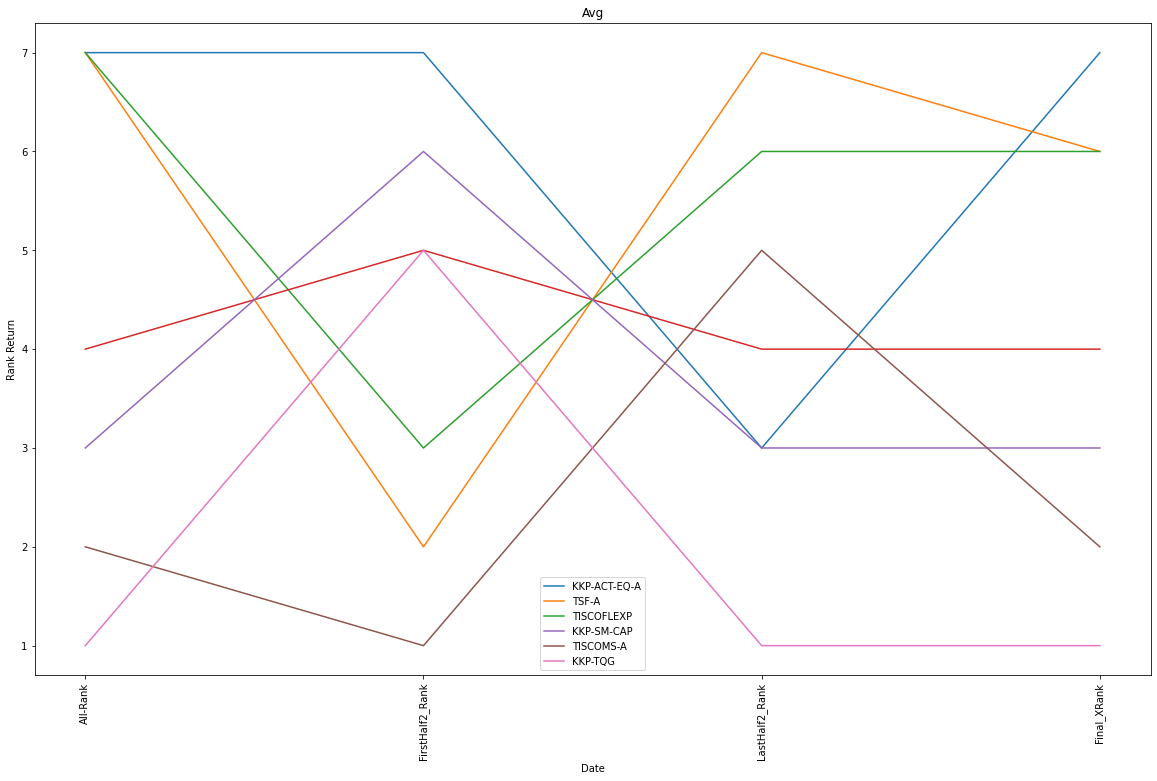

In [123]:

df_xyz_rank=pd.concat([ rank_x[rankCol_name_all],rank_firstY[rankCol_name_first],
                        rank_y[rankCol_name_last]],axis=1)
    
df_xyz_rank["Avg_XRank"]=df_xyz_rank.mean(axis=1,skipna=True).round(1)
df_xyz_rank["Final_XRank"]=df_xyz_rank["Avg_XRank"].rank(method='max')
    
df_xyz_rank=df_xyz_rank.sort_values(by="Final_XRank",ascending=False)

df_xyz_rank["%Rank"]=df_xyz_rank['Final_XRank'].rank(method='max',pct = True)
df_xyz_rank["%Rank"]=(df_xyz_rank["%Rank"]*100).round(1)

df_xyz_rank=df_xyz_rank.drop(columns=["Avg_XRank"])


plot_rank_line(df_xyz_rank , 'Avg')

In [124]:
   
def cal_statistics_des(x_cols,df_temp):
    
 des_colsOrder=['mean','50%', 'std','max','min','count']  
#  x_cols=x_cols.append("AverageMarket")
#  print(x_cols)
 df_stat_desc=df_temp[x_cols].describe()

 df_stat_desc=df_stat_desc[x_cols].round(1)

 df_stat_desc = df_stat_desc.T
 df_stat_desc=df_stat_desc.loc[:,des_colsOrder]   
 
    
 des_colsOrder=list(df_stat_desc.columns)
 df_stat_desc['mean-50%']= df_stat_desc['mean']-  df_stat_desc['50%']
 des_colsOrder.insert(2,'mean-50%')
 
 df_stat_desc=df_stat_desc.sort_values(by=des_colsOrder,ascending=False)

 df_stat_desc=df_stat_desc[des_colsOrder]
    
 return df_stat_desc,des_colsOrder

In [125]:
df_stat_desc,des_colsOrder=cal_statistics_des(list_fund_name,fund_x)
df_stat_desc

,mean,50%,mean-50%,std,max,min,count
KKP-ACT-EQ-A,0.4,1.0,-0.6,3.5,3.6,-4.1,4.0
TSF-A,0.1,0.6,-0.5,7.6,8.1,-8.8,4.0
TISCOFLEXP,0.1,-1.1,1.2,7.1,9.3,-7.0,4.0
_AVG_,-0.9,-0.2,-0.7,5.3,4.6,-8.0,4.0
KKP-SM-CAP,-1.1,-0.2,-0.9,3.9,2.6,-6.6,4.0
TISCOMS-A,-2.3,-0.9,-1.4,6.4,3.3,-10.8,4.0
KKP-TQG,-2.6,-0.9,-1.7,5.7,1.8,-10.4,4.0


In [126]:
if no_record>=2:
    dfFirstHalf_stat_desc,des_colsOrder=cal_statistics_des(list_fund_name,fund_xFirstHalf)
    print(dfFirstHalf_stat_desc)

              mean  50%  mean-50%  std  max   min  count
KKP-ACT-EQ-A  -0.2 -0.2       0.0  5.4  3.6  -4.1    2.0
KKP-SM-CAP    -3.8 -3.7      -0.1  4.0 -0.9  -6.6    2.0
KKP-TQG       -4.3 -4.3       0.0  8.6  1.8 -10.4    2.0
_AVG_         -4.5 -4.5       0.0  4.9 -1.0  -8.0    2.0
TISCOFLEXP    -5.2 -5.2       0.0  2.5 -3.5  -7.0    2.0
TSF-A         -6.0 -6.0       0.0  4.0 -3.2  -8.8    2.0
TISCOMS-A     -7.2 -7.2       0.0  5.0 -3.7 -10.8    2.0


In [127]:
if no_record>=2:
    dfLastHalf_stat_desc,des_colsOrder=cal_statistics_des(list_fund_name,fund_xLastHalf)
    print(dfLastHalf_stat_desc)

              mean  50%  mean-50%  std  max  min  count
TSF-A          6.2  6.2       0.0  2.6  8.1  4.4    2.0
TISCOFLEXP     5.4  5.4       0.0  5.6  9.3  1.4    2.0
_AVG_          2.6  2.6       0.0  2.8  4.6  0.7    2.0
TISCOMS-A      2.6  2.6       0.0  1.0  3.3  1.9    2.0
KKP-SM-CAP     1.5  1.5       0.0  1.6  2.6  0.4    2.0
KKP-ACT-EQ-A   1.0  1.0       0.0  2.4  2.7 -0.7    2.0
KKP-TQG       -0.9 -0.9       0.0  3.3  1.4 -3.2    2.0


In [128]:
avgStatDesc_df=(df_stat_desc+dfFirstHalf_stat_desc+dfLastHalf_stat_desc)/3

avgStatDesc_df=avgStatDesc_df.round(1)
avgStatDesc_df=avgStatDesc_df.sort_values(by=des_colsOrder,ascending=False)
avgStatDesc_df=avgStatDesc_df.drop(columns=["count"])

avgStatDesc_df

,mean,50%,mean-50%,std,max,min
KKP-ACT-EQ-A,0.4,0.6,-0.2,3.8,3.3,-3.0
TSF-A,0.1,0.3,-0.2,4.7,4.3,-4.4
TISCOFLEXP,0.1,-0.3,0.4,5.1,5.0,-4.2
_AVG_,-0.9,-0.7,-0.2,4.3,2.7,-5.1
KKP-SM-CAP,-1.1,-0.8,-0.3,3.2,1.4,-4.3
TISCOMS-A,-2.3,-1.8,-0.5,4.1,1.0,-6.6
KKP-TQG,-2.6,-2.0,-0.6,5.9,1.7,-8.0


In [129]:

def plot_bar_performance(df,x_chart):

  fig = plt.figure(figsize = (20, 10))

  X_axis = np.arange(len(df))
  X_point=0.00
  X_width=0.1  
  listChart=[]  
    
  for colName  in df.columns:
    chart=plt.bar(X_axis+X_point,df[colName],0.1, label =colName)
    X_point+=X_width
    listChart.append(chart)
    
 
  
  plt.xticks(X_axis, df.index,rotation='vertical')
  plt.xlabel("Period")
  plt.ylabel("% Return")
  plt.title(f"Fund Perforamnce Return {x_chart}")
  plt.legend()
   
  plt.savefig(f'{report_path}\\Retun_{x_chart}.png')

  plt.show()


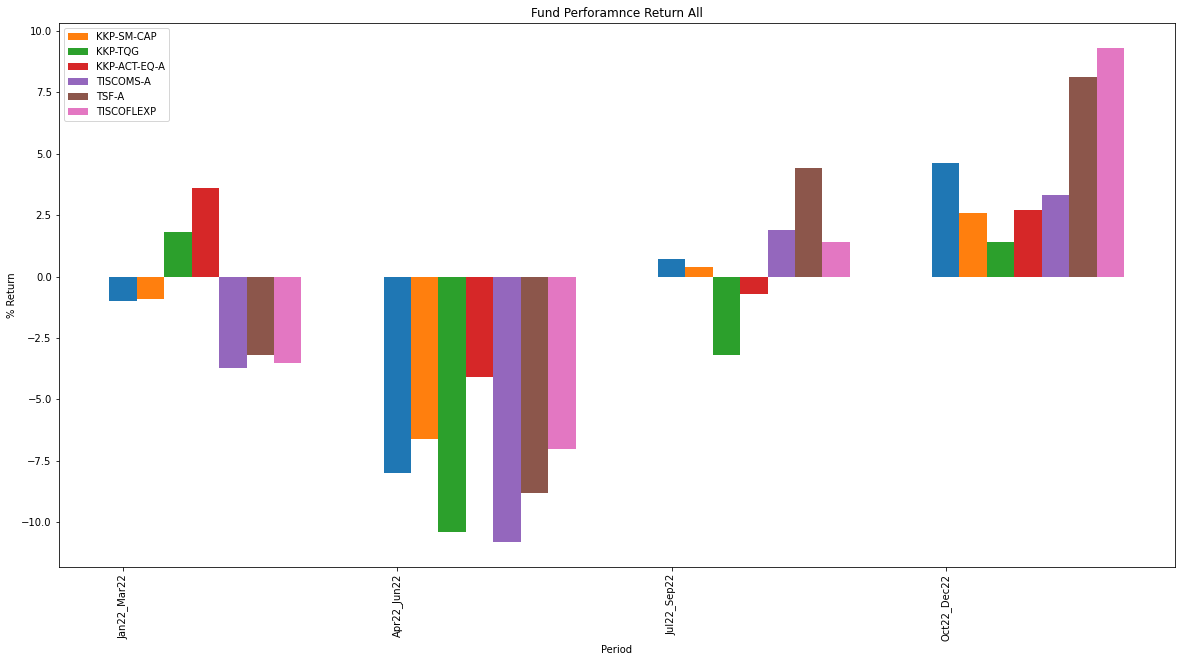

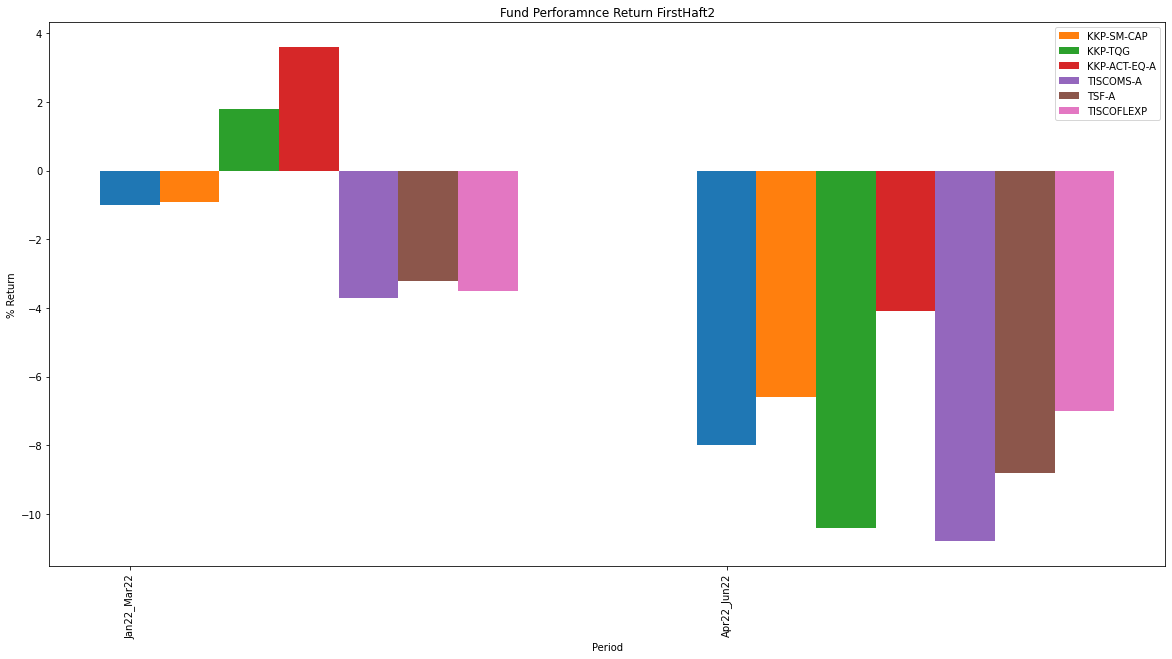

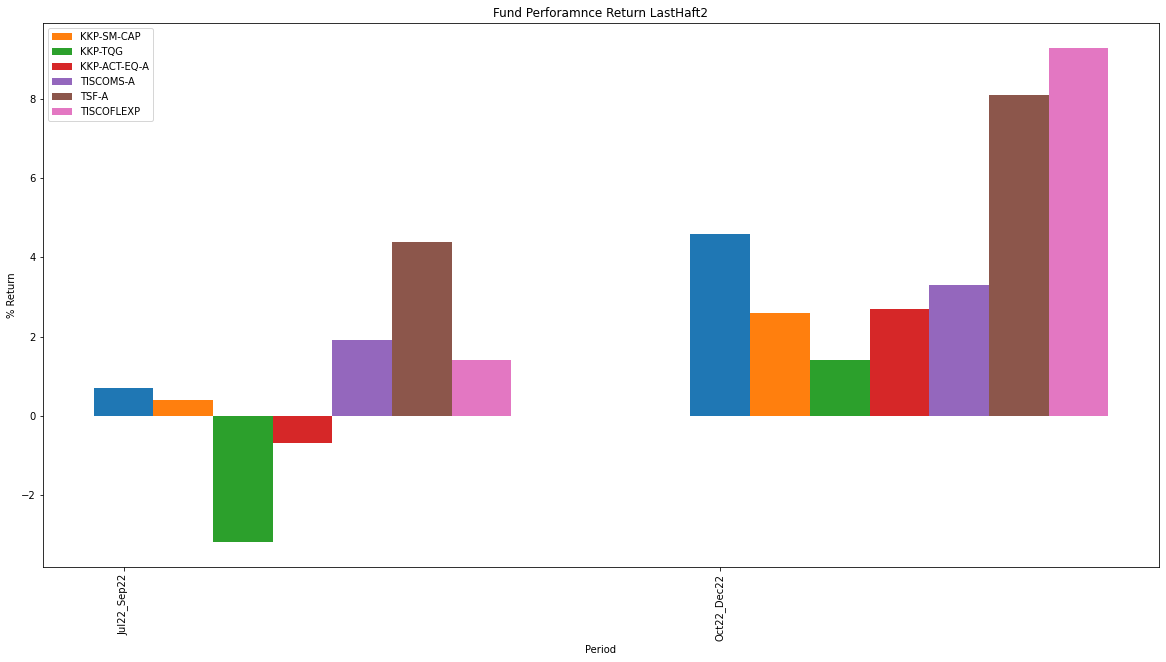

In [130]:
fund_x=fund_x.loc[:,list_fund_name]
fund_xFirstHalf=fund_xFirstHalf.loc[:,list_fund_name]
fund_xLastHalf=fund_xLastHalf.loc[:,list_fund_name]

plot_bar_performance(fund_x,'All')
if no_record>=2:
    plot_bar_performance(fund_xFirstHalf,f'FirstHaft{val_ma}')
    plot_bar_performance(fund_xLastHalf,f'LastHaft{val_ma}')



In [131]:
def appped_x_to_last_row(df):
 df_sum=df.sum(axis=0,skipna=True).to_frame(name='__sum')
 df_sum=df_sum.T
    
 df_avg=df.mean(axis=0,skipna=True).to_frame(name='__avg')
 df_avg=df_avg.T 
 df_avg=df_avg.round(1)   
    
 return pd.concat([df,df_sum,df_avg]) 


fund_x=appped_x_to_last_row(fund_x)
if no_record>=2:
    fund_xFirstHalf=appped_x_to_last_row(fund_xFirstHalf)
    fund_xLastHalf=appped_x_to_last_row(fund_xLastHalf)


In [132]:

file_name = f"{title}_{start_test}_{end_test}.xlsx"
result_path=f"{report_path}\\{file_name}"
print(result_path)
print("Create Fund Performance  Report as Excel file")
writer=pd.ExcelWriter(result_path,engine='xlsxwriter') 

df_xyz_rank.to_excel(writer, sheet_name="Rank-Avg",index=True)
avgStatDesc_df.to_excel(writer, sheet_name="StatDes-Avg",index=True)

fund_x.to_excel(writer, sheet_name="Return",index=True)
rank_x.to_excel(writer, sheet_name="Rank",index=True)
df_stat_desc.to_excel(writer, sheet_name="StatDes",index=True)
  
if no_record>=2:
    fund_xFirstHalf.to_excel(writer, sheet_name=f"First{val_ma}-Return",index=True)
    rank_firstY.to_excel(writer, sheet_name=f"First{val_ma}-Rank",index=True)
    dfFirstHalf_stat_desc.to_excel(writer, sheet_name=f"First{val_ma}-StatDes",index=True)


    fund_xLastHalf.to_excel(writer, sheet_name=f"FLast{val_ma}-Return",index=True)
    rank_y.to_excel(writer, sheet_name=f"FLast{val_ma}-Rank",index=True)
    dfLastHalf_stat_desc.to_excel(writer, sheet_name=f"FLast{val_ma}-StatDes",index=True)


writer.save()

print("Successfully")

D:\PythonDev\MyQuantFinProject\Data\Report\KKP-Tisco-Y22\KKP-Tisco-Y22_Jan22_Mar22_Oct22_Dec22.xlsx
Create Fund Performance  Report as Excel file


C:\Users\pongthsa\AppData\Local\Temp\ipykernel_28436\1038620986.py:25: FutureWarning: save is not part of the public API, usage can give in unexpected results and will be removed in a future version
  writer.save()


Successfully
